In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Input Rate of Broker-1
df1b = pd.read_csv("Brok1IR.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-08-13 18:17:32,482940176,my-cluster-metrics-kafka-0
1,2021-08-13 18:18:02,495718228,my-cluster-metrics-kafka-0
2,2021-08-13 18:18:32,506827105,my-cluster-metrics-kafka-0


In [2]:
#Average Input Rate before rebalancing
irbr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:17:32') & (df1b['timestamp'] <= '2021-08-13 18:30:00')]
irbr1.head(3)
irbr1avg = irbr1['values'].mean()
print(irbr1avg)
irbr1.describe()

652276749.16


,values
count,2.500000e+01
mean,6.522767e+08
std,1.008716e+08
min,4.829402e+08
25%,5.737440e+08
50%,6.580417e+08
75%,7.334212e+08
max,8.148921e+08


In [3]:
#Average Input Rate During rebalancing
irdr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:31:00') & (df1b['timestamp'] <= '2021-08-13 18:43:00')]
irdr1.head(3)
irdr1avg = irdr1['values'].mean()
print(irdr1avg)
irdr1.describe()

1001128559.5


,values
count,2.400000e+01
mean,1.001129e+09
std,8.988006e+07
min,8.632949e+08
25%,9.272717e+08
50%,9.922826e+08
75%,1.079686e+09
max,1.144864e+09


In [4]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1ir = ttest_ind(irdr1['values'], irbr1['values'])
print(resb1ir)

Ttest_indResult(statistic=12.762341613253545, pvalue=6.985848016287978e-17)


In [5]:
irbr1.drop(['pod'], axis=1, inplace=True)
irbr1.head(10)
irbr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  25 non-null     datetime64[ns]
 1   values     25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 600.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
irdr1.drop(['pod'], axis=1, inplace=True)
irdr1.head(10)
irdr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 27 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker1 Input Rate')

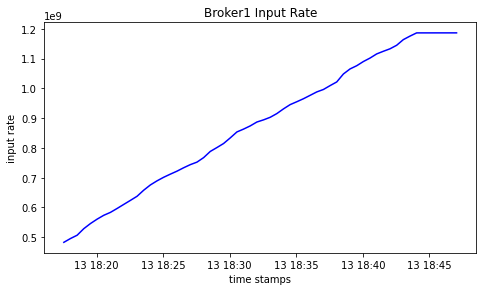

In [7]:
from datetime import datetime
#Input Rate for the entire load test
i1=[]
for dat in df1b.timestamp:
    # print (dat)
    i1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(i1,df1b['values'], 'b')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('input rate')
axe1.set_title('Broker1 Input Rate')
#fig1.tight_layout()

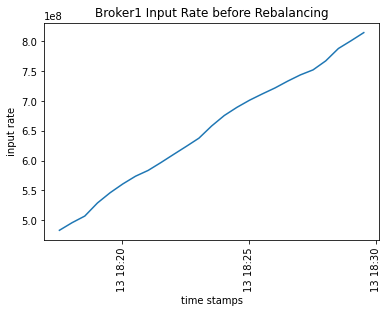

In [8]:
#Input Rate before rebalancing
b1=[]
for dat in irbr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,irbr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate before Rebalancing')
plt.show()

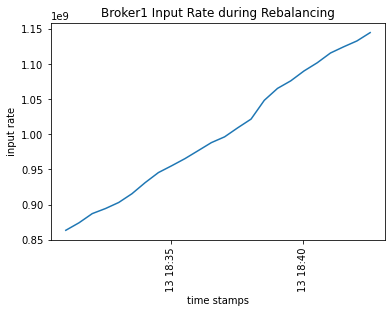

In [9]:
#Input Rate during rebalancing
d1=[]
for dat in irdr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,irdr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate during Rebalancing')
plt.show()

In [10]:
# DA on the Input Rate of Broker-2
df2b = pd.read_csv("Brok2IR.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-08-13 18:17:50,472836109,my-cluster-metrics-kafka-1
1,2021-08-13 18:18:20,490992903,my-cluster-metrics-kafka-1
2,2021-08-13 18:18:50,502890400,my-cluster-metrics-kafka-1


In [11]:
#Average Input Rate before rebalancing
irbr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:17:50') & (df2b['timestamp'] <= '2021-08-13 18:30:00')]
irbr2.head(3)
irbr2avg = irbr2['values'].mean()
print(irbr2avg)
irbr2.describe()

652773137.32


,values
count,2.500000e+01
mean,6.527731e+08
std,1.053905e+08
min,4.728361e+08
25%,5.642800e+08
50%,6.607231e+08
75%,7.404252e+08
max,8.218113e+08


In [12]:
#Average Input Rate During rebalancing
irdr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:31:00') & (df2b['timestamp'] <= '2021-08-13 18:43:00')]
irdr2.head(3)
irdr2avg = irdr2['values'].mean()
print(irdr2avg)
irdr2.describe()

984530882.875


,values
count,2.400000e+01
mean,9.845309e+08
std,8.077832e+07
min,8.581352e+08
25%,9.091885e+08
50%,9.923341e+08
75%,1.044195e+09
max,1.124447e+09


In [13]:
#T-Stats Analysis
resb2ir = ttest_ind(irdr2['values'], irbr2['values'])
print(resb2ir)

Ttest_indResult(statistic=12.329967742614604, pvalue=2.4501212222578823e-16)


In [14]:
irbr2.drop(['pod'], axis=1, inplace=True)
irbr2.head(10)
irbr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  25 non-null     datetime64[ns]
 1   values     25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 600.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
irdr2.drop(['pod'], axis=1, inplace=True)
irdr2.head(10)
irdr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 27 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker2 Input Rate')

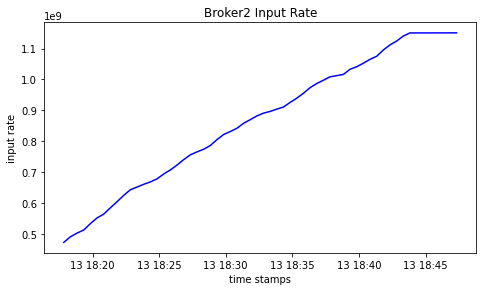

In [16]:
from datetime import datetime
#Input Rate for the entire load test
i2=[]
for dat in df2b.timestamp:
    # print (dat)
    i2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(i2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('input rate')
axe2.set_title('Broker2 Input Rate')
#fig1.tight_layout()

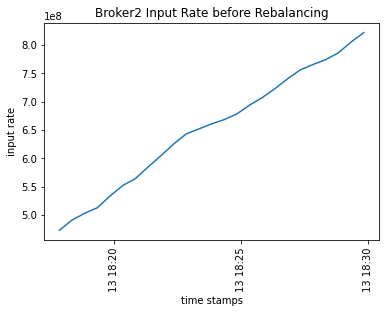

In [17]:
#Input Rate before rebalancing
b2=[]
for dat in irbr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,irbr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate before Rebalancing')
plt.show()

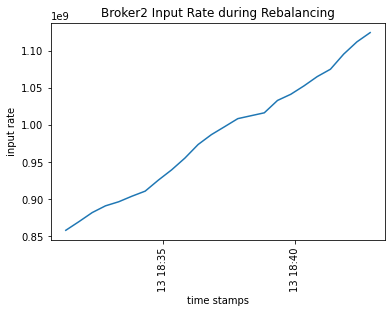

In [18]:
#Input Rate during rebalancing
d2=[]
for dat in irdr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,irdr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate during Rebalancing')
plt.show()

In [19]:
# DA on the Input Rate of Broker-3
df3b = pd.read_csv("Brok3IR.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-08-13 18:18:25,533471041,my-cluster-metrics-kafka-2
1,2021-08-13 18:18:55,549908409,my-cluster-metrics-kafka-2
2,2021-08-13 18:19:25,562297338,my-cluster-metrics-kafka-2


In [20]:
#Average Input Rate before rebalancing
irbr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:18:25') & (df3b['timestamp'] <= '2021-08-13 18:30:00')]
irbr3.head(3)
irbr3avg = irbr3['values'].mean()
print(irbr3avg)
irbr3.describe()

687279438.1666666


,values
count,2.400000e+01
mean,6.872794e+08
std,1.033275e+08
min,5.334710e+08
25%,6.057652e+08
50%,6.669008e+08
75%,7.787207e+08
max,8.570926e+08


In [21]:
#Average Input Rate During rebalancing
irdr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:31:00') & (df3b['timestamp'] <= '2021-08-13 18:43:00')]
irdr3.head(3)
irdr3avg = irdr3['values'].mean()
print(irdr3avg)
irdr3.describe()

1072572000.4583334


,values
count,2.400000e+01
mean,1.072572e+09
std,9.938228e+07
min,9.115806e+08
25%,9.853464e+08
50%,1.071825e+09
75%,1.153585e+09
max,1.232724e+09


In [22]:
#T-Stats Analysis
resb3ir = ttest_ind(irdr3['values'], irbr3['values'])
print(resb3ir)

Ttest_indResult(statistic=13.166016788911689, pvalue=3.2694680334436893e-17)


In [23]:
irbr3.drop(['pod'], axis=1, inplace=True)
irbr3.head(10)
irbr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
irdr3.drop(['pod'], axis=1, inplace=True)
irdr3.head(10)
irdr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 26 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  24 non-null     datetime64[ns]
 1   values     24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 576.0 bytes


Text(0.5, 1.0, 'Broker3 Input Rate')

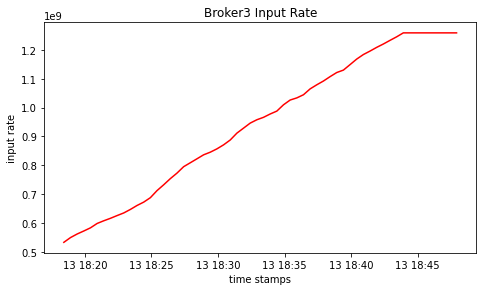

In [25]:
from datetime import datetime
#Input Rate for the entire load test
i3=[]
for dat in df3b.timestamp:
    # print (dat)
    i3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(i3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('input rate')
axe3.set_title('Broker3 Input Rate')
#fig1.tight_layout()

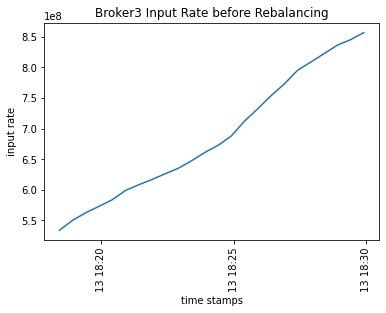

In [26]:
#Input Rate before rebalancing
b3=[]
for dat in irbr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,irbr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate before Rebalancing')
plt.show()

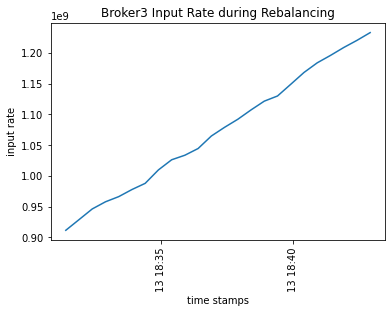

In [27]:
#Input Rate during rebalancing
d3=[]
for dat in irdr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,irdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate during Rebalancing')
plt.show()

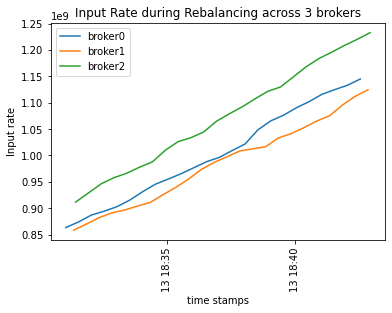

In [28]:
plt.plot(d1,irdr1['values'])
plt.plot(d2,irdr2['values'])
plt.plot(d3,irdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('Input rate')
plt.title('Input Rate during Rebalancing across 3 brokers')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()